In [1]:
import sys
sys.path.append('../src')
import neuralnetworkclassifier as nnc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, gzip
import torch
import cifar10

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
cifar10.data_path = "../data"

In [5]:
class_names = cifar10.load_class_names()

Loading data: ../data/cifar-10-batches-py/batches.meta


In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: ../data/cifar-10-batches-py/data_batch_1
Loading data: ../data/cifar-10-batches-py/data_batch_2
Loading data: ../data/cifar-10-batches-py/data_batch_3
Loading data: ../data/cifar-10-batches-py/data_batch_4
Loading data: ../data/cifar-10-batches-py/data_batch_5


In [7]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: ../data/cifar-10-batches-py/test_batch


In [8]:
class_names[cls_test[1]]

'ship'

In [9]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
Xtrain = images_train.reshape(-1, 3, 32, 32)
Ttrain = cls_train.reshape(-1, 1)
Xtest = images_test.reshape(-1, 3, 32, 32)
Ttest = cls_test.reshape(-1, 1)
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 3, 32, 32), (50000, 1), (10000, 3, 32, 32), (10000, 1))

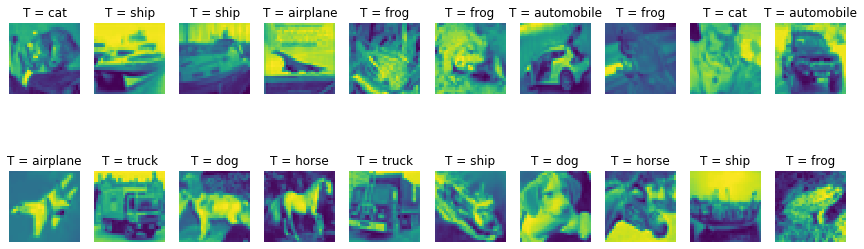

In [11]:
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(Xtest[i, 0, :, :])
    plt.title(f'T = {(class_names[cls_test[i]])}')
    plt.axis('off');

In [12]:
Xtrain_flat = Xtrain.reshape((-1, 1024))
Xtrain_flat.shape

Xtest_flat = Xtest.reshape((-1, 1024))
Xtest_flat.shape

(30000, 1024)

In [13]:
classes = np.unique(Ttrain)

_, Ttrain_0 = np.where(Ttrain)
_, Ttest_0 = np.where(Ttest)

Xtraint = torch.tensor(Xtrain_flat)
Ttraint = torch.tensor(Ttrain_0)
Xtestt = torch.tensor(Xtest_flat)
Ttestt = torch.tensor(Ttest_0)

Xtmean = Xtraint.mean(0)
Xtstd = Xtraint.std(0)

In [14]:
nnet = nnc.NeuralNetwork_Convolutional(n_channels_in_image=Xtrain.shape[1],
                                   image_size=Xtrain.shape[2],
                                   n_units_in_conv_layers=[5, 20, 10],
                                   kernels_size_and_stride=[[9, 3]],
                                   n_units_in_fc_hidden_layers=[35], 
                                   classes=classes,
                                   use_gpu=True)

nnet.train(Xtrain.astype(np.float32), Ttrain.astype(np.float32), 10, learning_rate=0.005, verbose=True)


GPU is not available. Running on CPU.

Epoch 1 error 2.32519
Epoch 2 error 2.28480
Epoch 3 error 2.16251
Epoch 4 error 2.10223
Epoch 5 error 2.04900
Epoch 6 error 2.01778
Epoch 7 error 1.98739
Epoch 8 error 1.96568
Epoch 9 error 1.94454
Epoch 10 error 1.92654


In [15]:
#nnet

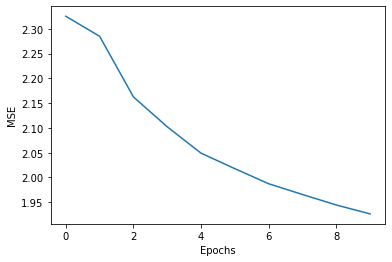

In [16]:
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('MSE');

3216 out of 10000 samples, or 32.16 percent.


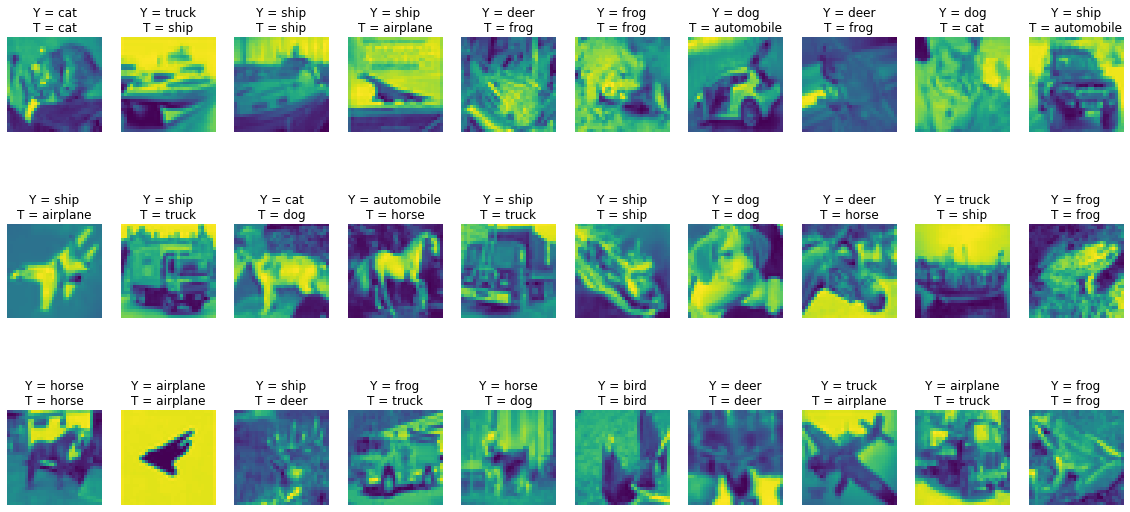

In [17]:
Yclasses, Y = nnet.use(Xtest.astype(np.float32))
n_correct = (Yclasses == Ttest).sum()
print(f'{n_correct} out of {Ttest.shape[0]} samples, or {n_correct/Ttest.shape[0]*100:.2f} percent.')

plt.figure(figsize=(20, 20))
for i in range(30):
    plt.subplot(6, 10, i + 1)
    plt.imshow(Xtest[i, 0, :, :])
    plt.title(f'Y = {(class_names[int(Yclasses[i])])}\nT = {(class_names[cls_test[i]])}')
    plt.axis('off')